In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

# Normal Game Play

In [3]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [4]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [426]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render()
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [427]:
info

{'winner': 0,
 'reward_closeness_to_puck': 0,
 'reward_touch_puck': 0.0,
 'reward_puck_direction': -0.002885766296386719}

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [428]:
env.close()

# Train Shooting

In [429]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [432]:
o = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Player 1 scored


In [433]:
env.close()

# Train DEFENDING

In [434]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [435]:
o = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Player 1 scored


In [436]:
env.close()

# Using discrete actions

In [437]:
import random

In [438]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [444]:
env.reset()
for _ in range(200):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [445]:
env.close()

# Hand-crafted Opponent

In [3]:
env = h_env.HockeyEnv()

In [4]:
o = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [5]:
obs_buffer = []

In [6]:
obs = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(30):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    obs_agent2 = env.obs_agent_two()
    if d: break

In [451]:
obs_buffer = np.asarray(obs_buffer)

In [452]:
np.mean(obs_buffer,axis=0)

array([-3.0085486 , -0.21004961,  0.03664976, -0.01096319, -0.17176204,
        0.15506244,  2.71742919, -0.52979803,  0.03053882,  0.03795479,
       -0.09696343,  0.03866356,  0.03569815, -0.6134662 ,  0.32636683,
       -0.81226863,  2.09163347,  1.25498008])

In [453]:
np.std(obs_buffer,axis=0)

array([ 0.58471931,  0.65634553,  0.64202071,  3.98026686,  3.82127452,
        3.45764515,  0.75280629,  0.66553158,  0.15171728,  4.32247481,
        1.29773149,  0.78672723,  2.02254953,  1.44520845, 19.41161033,
        8.8133033 ,  4.38527618,  3.54800953])

If you want to use a fixed observation scaling, this might be a reasonable choice

In [454]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [455]:
import pylab as plt

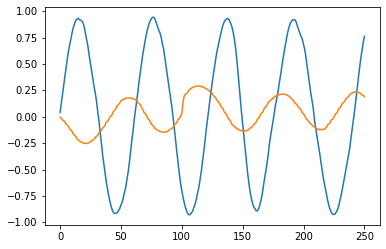

In [456]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

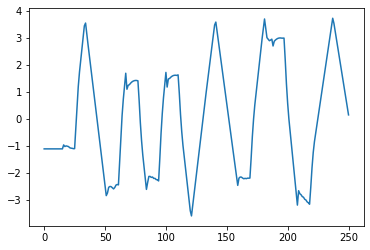

In [457]:
plt.plot(obs_buffer[:,12])

In [458]:
env.close()

# Human Opponent

In [459]:
env = h_env.HockeyEnv()

True

In [419]:
player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()

Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [460]:
o = env.reset()
env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(200):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

Player 2 scored


In [461]:
env.close()